In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("seeds_dataset.txt", delimiter = '\t', header = None, names=['Area', 'Perimeter', 'Compactness', 'length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove','Class'])

In [3]:
df.head()

,Area,Perimeter,Compactness,length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.tail()

,Area,Perimeter,Compactness,length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [54]:
df.shape

(210, 8)

In [6]:
#shape of the data
df.shape

(210, 8)

In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [9]:
#descibe the data
df.describe()

,Area,Perimeter,Compactness,length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
#column to list
df.columns.tolist()

['Area',
 'Perimeter',
 'Compactness',
 'length of kernel',
 'Width of kernel',
 'Asymmetry coefficient',
 'Length of kernel groove',
 'Class']

In [11]:
#check for missing values
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class                      0
dtype: int64

In [12]:
#checking duplicates
df.nunique()

Area                       193
Perimeter                  170
Compactness                186
length of kernel           188
Width of kernel            184
Asymmetry coefficient      207
Length of kernel groove    148
Class                        3
dtype: int64

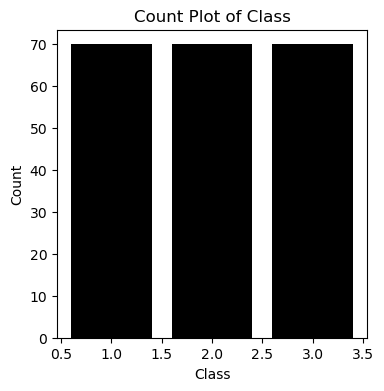

In [28]:
quality_counts = df['Class'].value_counts()
 
plt.figure(figsize=(4, 4))
plt.bar(quality_counts.index, quality_counts, color='black')
plt.title('Count Plot of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

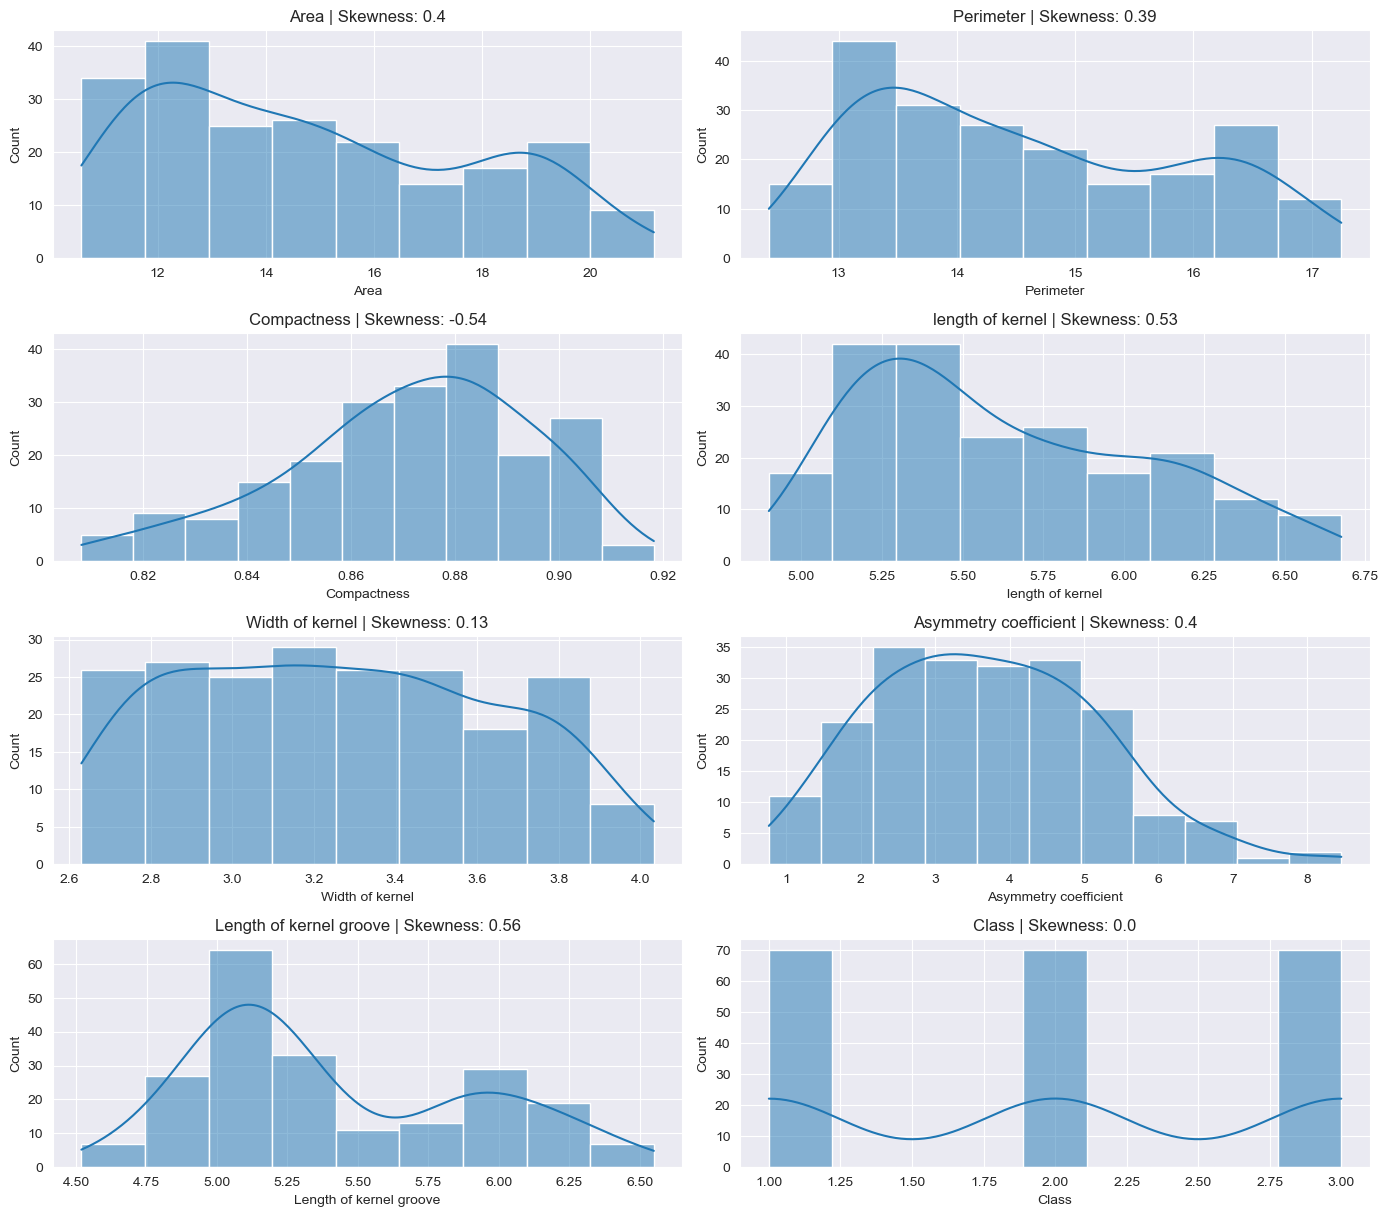

In [34]:
# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

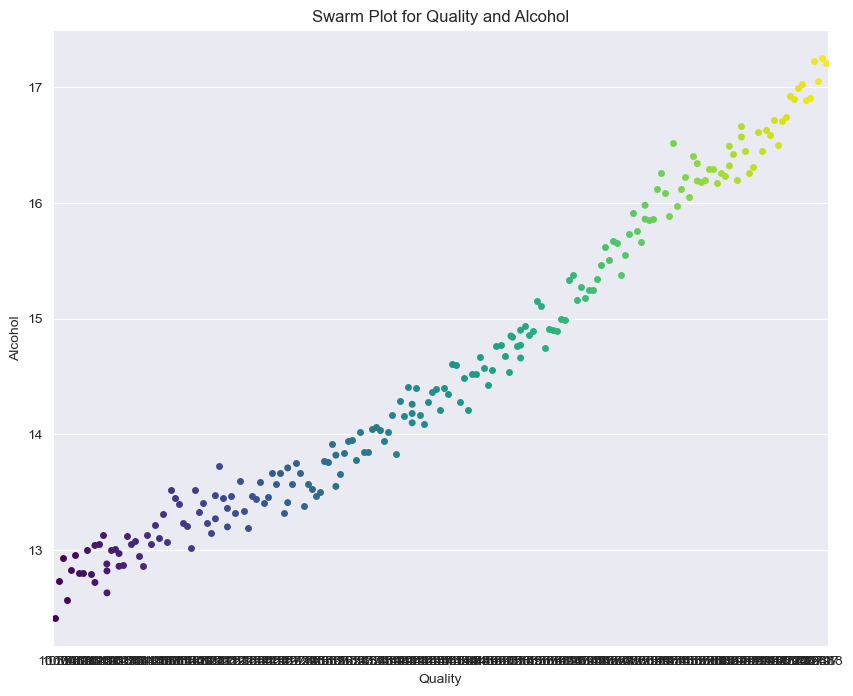

In [35]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))
 
# Using Seaborn to create a swarm plot
sns.swarmplot(x="Area", y="Perimeter", data=df, palette='viridis')
 
plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

In [68]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values - 1

In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [72]:
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [73]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3486 - loss: 2.0428 - val_accuracy: 0.1935 - val_loss: 1.5275
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4224 - loss: 1.2860 - val_accuracy: 0.6129 - val_loss: 0.9287
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4135 - loss: 1.0141 - val_accuracy: 0.3548 - val_loss: 0.9813
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3608 - loss: 1.0346 - val_accuracy: 0.4839 - val_loss: 0.9743
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6364 - loss: 0.8905 - val_accuracy: 0.6129 - val_loss: 0.8954
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7695 - loss: 0.8677 - val_accuracy: 0.6452 - val_loss: 0.8407
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6576 - loss: 0.8565 - val_accuracy: 0.8387 - val_loss: 0.7864
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7790 - loss: 0.8195 - val_accuracy: 0.8387 - val_loss: 0.7741
Epoch 

In [76]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


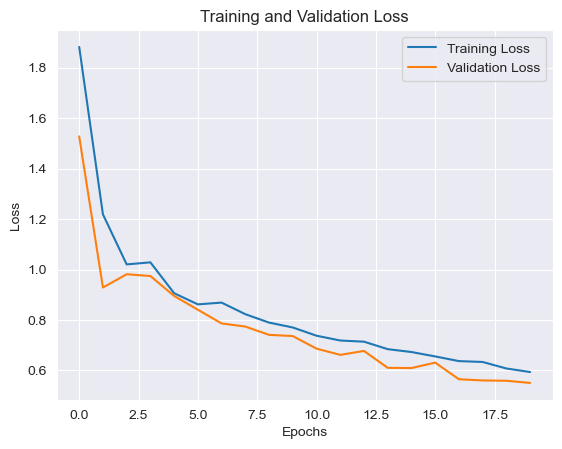

In [77]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

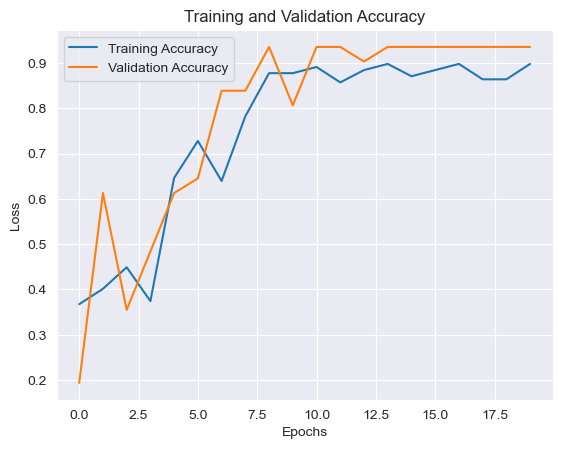

In [78]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.6369
Test Loss: 0.63686603307724, Test Accuracy: 0.875


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8628 - loss: 0.2550 - val_accuracy: 0.9032 - val_loss: 0.2178
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8811 - loss: 0.2341 - val_accuracy: 0.9032 - val_loss: 0.2162
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8915 - loss: 0.2350 - val_accuracy: 0.9032 - val_loss: 0.2173
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8568 - loss: 0.2866 - val_accuracy: 0.9032 - val_loss: 0.2170
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9032 - loss: 0.2116 - val_accuracy: 0.9032 - val_loss: 0.2190
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8689 - loss: 0.2572 - val_accuracy: 0.9032 - val_loss: 0.2212
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8737 - loss: 0.2429 - val_accuracy: 0.9032 - val_loss: 0.2208
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8929 - loss: 0.2166 - val_accuracy: 0.9032 - val_loss: 0.2216
Epoch 9

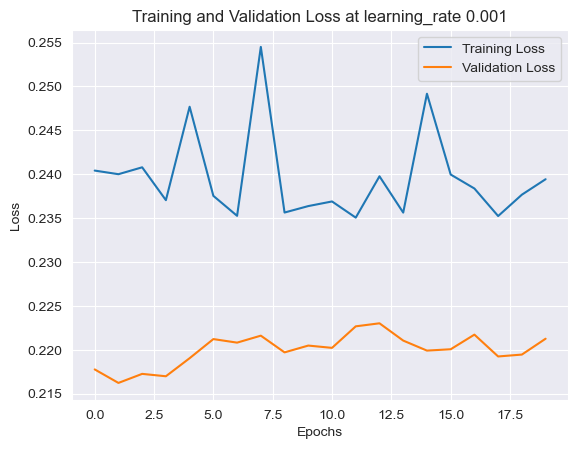

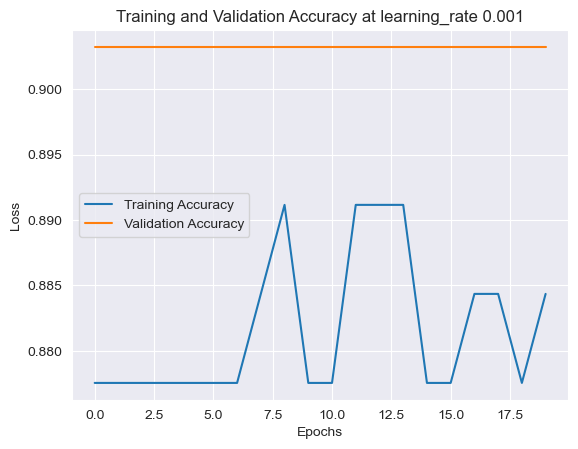

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.4161
Test Loss: 0.41614118218421936, Test Accuracy: 0.75

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8468 - loss: 0.3019 - val_accuracy: 0.8387 - val_loss: 0.2552
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8959 - loss: 0.2300 - val_accuracy: 0.9355 - val_loss: 0.2110
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8975 - loss: 0.2722 - val_accuracy: 0.9032 - val_loss: 0.2177
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8454 - loss: 0.2803 - val_accuracy: 0.8710 - val_loss: 0.2389
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8819 - loss: 0.2679 - val_accuracy: 0.9032 - val_loss: 0.2206
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8637 - loss: 0.2521 - val_accuracy: 0.9032 - val_loss: 0.2207
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8820 - loss: 0.2419 - val_accuracy: 0.9032 - val_loss: 0.2245
Epoch 

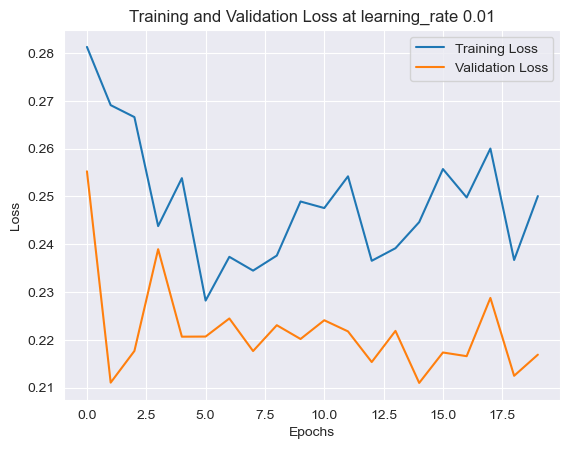

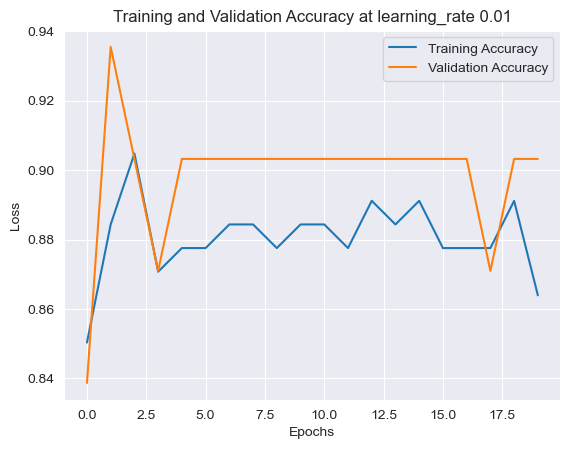

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7500 - loss: 0.4342
Test Loss: 0.434193879365921, Test Accuracy: 0.75

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6145 - loss: 2.6342 - val_accuracy: 0.4839 - val_loss: 1.6407
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5492 - loss: 1.6645 - val_accuracy: 0.4194 - val_loss: 1.3574
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5446 - loss: 0.8909 - val_accuracy: 0.5161 - val_loss: 0.8103
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6310 - loss: 0.8558 - val_accuracy: 0.8387 - val_loss: 0.5670
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6685 - loss: 0.6030 - val_accuracy: 0.7419 - val_loss: 0.6510
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.5381 - val_accuracy: 0.8387 - val_loss: 0.3782
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7558 - loss: 0.5296 - val_accuracy: 0.8710 - val_loss: 0.3057
Epoch 8/

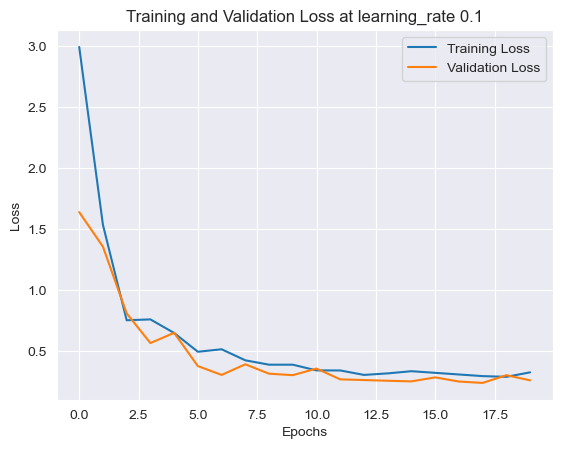

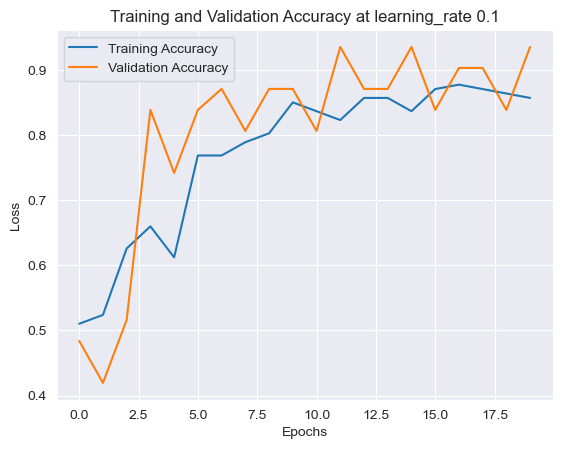

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 0.5968
Test Loss: 0.5968030691146851, Test Accuracy: 0.75

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5410 - loss: 5.6895 - val_accuracy: 0.1935 - val_loss: 3.2169
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3616 - loss: 2.1440 - val_accuracy: 0.4839 - val_loss: 1.4696
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3559 - loss: 1.7493 - val_accuracy: 0.3226 - val_loss: 1.1474
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3059 - loss: 1.4005 - val_accuracy: 0.3226 - val_loss: 1.3550
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3791 - loss: 1.2079 - val_accuracy: 0.1935 - val_loss: 1.3645
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3647 - loss: 1.1979 - val_accuracy: 0.4839 - val_loss: 1.1255
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3212 - loss: 1.1615 - val_accuracy: 0.3226 - val_loss: 1.0648
Epoch 8

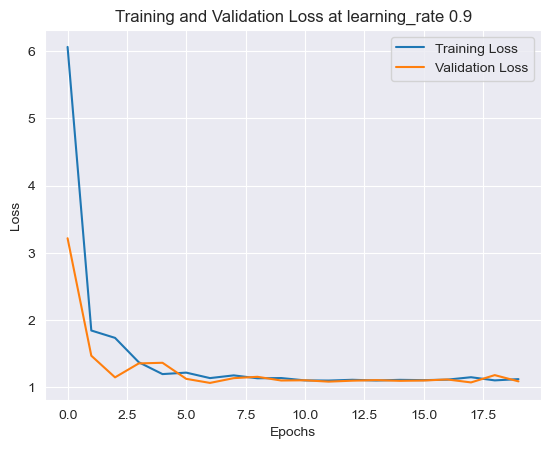

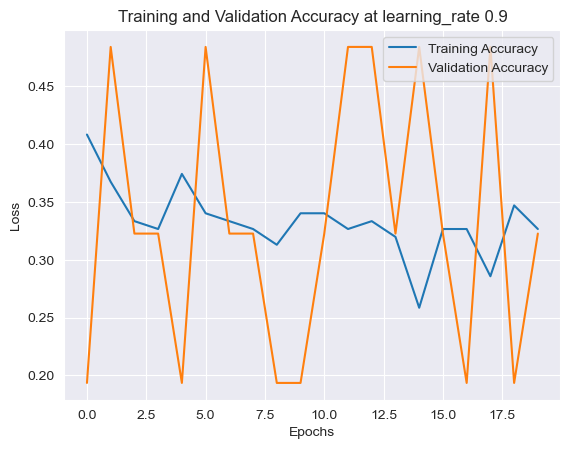

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3750 - loss: 1.1075
Test Loss: 1.1075373888015747, Test Accuracy: 0.375



In [88]:
numbers = [0.001, 0.01, 0.1, 0.9]
for learning_rate in numbers:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

    print(history.history.keys())

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss at learning_rate {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy at learning_rate {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
    print()